In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

In [16]:
df = pd.read_csv("../../datasets/wine_quality/winequality-red.csv", sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


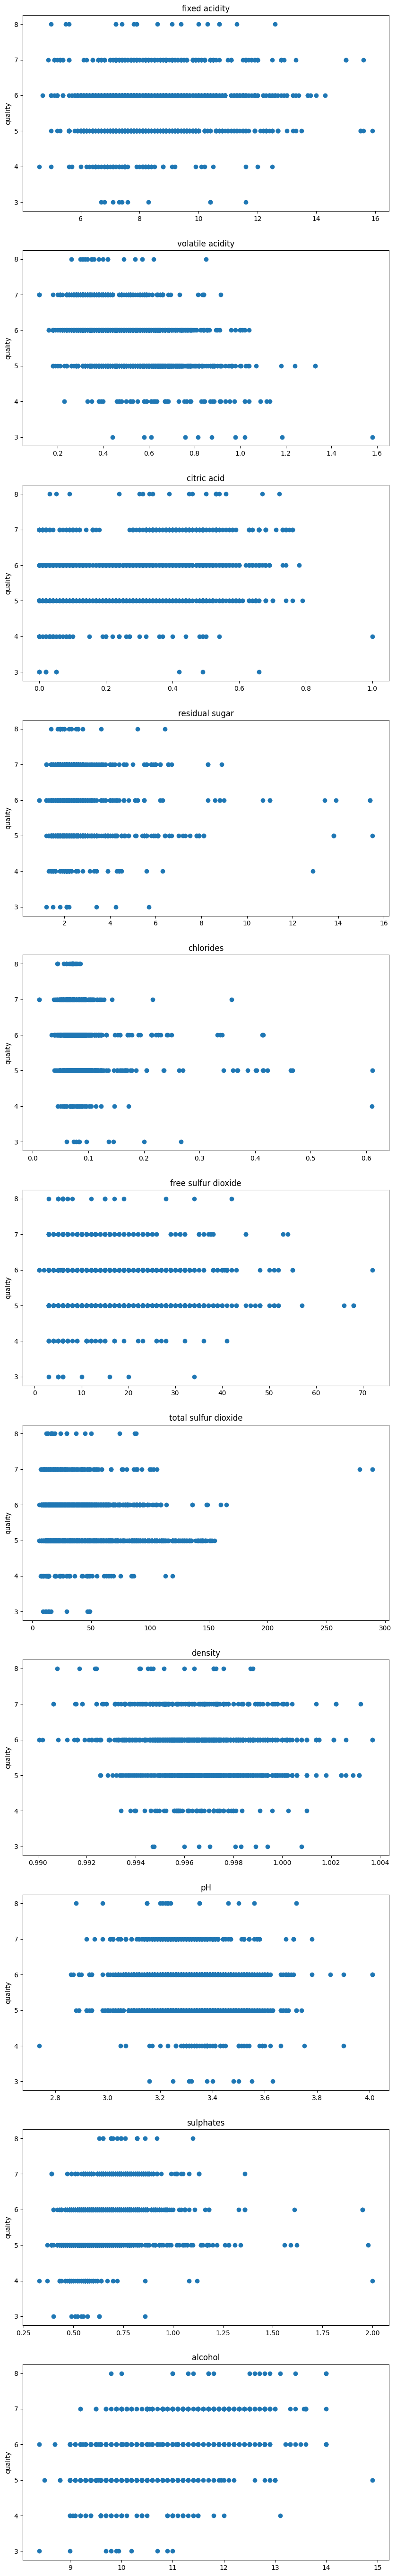

In [25]:
features = df.columns[:-1]
reg = df.columns[-1]
fig, ax = plt.subplots(len(features), figsize=(10, 70))
for figure, feature in zip(ax, features):
    figure.scatter(df[feature], df[reg], marker='o')
    figure.set_title(feature)
    figure.set_ylabel(reg)

In [61]:
train, test = np.split(df.sample(frac=1), [int(0.8*len(df))])

In [83]:
x_train, y_train = train["alcohol"].values.reshape(-1, 1), train["quality"].values.reshape(-1, 1)
x_test, y_test = test["alcohol"].values.reshape(-1, 1), test["quality"].values.reshape(-1, 1)

sklearning LinearRegression

In [63]:
sk_model = LinearRegression()
sk_model.fit(x_train, y_train)

LinearRegression()

In [64]:
print(sk_model.coef_, sk_model.intercept_)

[[0.37729358]] [1.71770593]


In [67]:
sk_model.score(x_test, y_test)
predictions = [int(v) for v in sk_model.predict(x_test)]
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.93      0.47      0.63       257
           6       0.24      0.51      0.33        61
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0

    accuracy                           0.48       320
   macro avg       0.20      0.16      0.16       320
weighted avg       0.79      0.47      0.56       320



c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

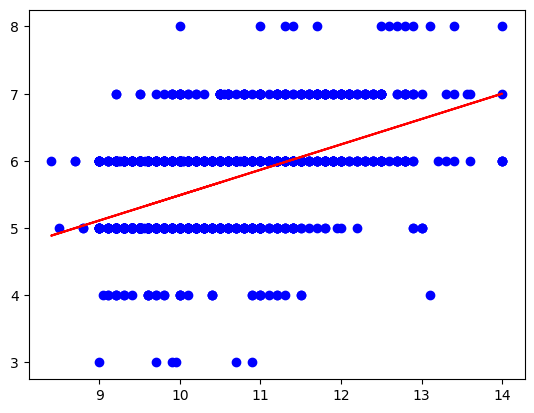

In [72]:
plt.scatter(x_train, y_train, label="Data", color='blue')
plt.plot(x_train, sk_model.predict(x_train), label="Fit", color="red")
plt.show()

Tensorflow NeuralNet

In [73]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train.reshape(-1))

In [75]:
tf_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(units=1)
])

In [76]:
tf_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['acurracy'])

In [84]:
history = tf_model.fit(x_train, y_train, verbose=0, epochs=100)

TypeError: 'NoneType' object is not callable

In [ ]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()